# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable.
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [ ]:
import pandas as pd
import requests
from pprint import pprint
def data_parser():
  df = pd.read_excel("/content/GHED_data.xlsx")
  df1 = df.iloc[:,0:8]
  df1 = df1.dropna()
  df1 = df1.set_index('country')
  df1['year'] = df1['year'].astype(int)
  df1 = df1[(df1['year'] == 2002) | (df1['year']== 2010) | (df1['year']== 2018)]
  df1.loc[::2,'che_pc_usd'] *= 1.28
  del df1['country code']
  del df1['region (WHO)']
  del df1['income group']
  df1 = df1.round(2)
  df1 = df1.rename(columns = {"che_gdp": 'Current Health Expenditure as % of GDP', 'che_pc_usd':'Current Health Expenditure per Capita in US dollars (Millions)','che_pc_ppp':'Current Health Expenditure per Capita in Purchasing Power Parity (PPP)'})
  df1 = df1.rename(index = {'Viet Nam': 'Vietnam'})
  df1.to_csv("cleanedGHEDdata.csv",index= True)
  pprint(df1)

# Sources Used: https://www.statology.org/pandas-select-multiple-columns/
# https://www.rba.gov.au/calculator/annualDecimal.html
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html





############ Function Call ############
data_parser()

         year  Current Health Expenditure as % of GDP  \
country                                                 
Algeria  2002                                    3.73   
Algeria  2010                                    5.12   
Algeria  2018                                    6.16   
Angola   2002                                    3.33   
Angola   2010                                    2.70   
...       ...                                     ...   
Vanuatu  2010                                    3.53   
Vanuatu  2018                                    3.35   
Vietnam  2002                                    3.60   
Vietnam  2010                                    4.70   
Vietnam  2018                                    5.03   

         Current Health Expenditure per Capita in US dollars (Millions)  \
country                                                                   
Algeria                                              85.07                
Algeria                          

## Web Collection Requirement \#1


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from pprint import pprint
def web_parser1():
  listy = []
  r = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_total_health_expenditure_per_capita')
  soup = BeautifulSoup(r.text, "html.parser")
  taglist = soup.find_all("tr")[38:-13]
  for row in taglist:
    info = row.find_all('td')
    infolist = []
    for info2 in info:
      infolist.append(info2.text)
    listy.append(infolist)
  df = pd.DataFrame(listy)
  df = df.dropna()

  df.columns = ['Country', '2002', '2010', '2018']
  df['Country'] = df['Country'].str.strip('*\n')
  df['2002'] = df['2002'].str.strip('*\n')
  df['2002'] = df['2002'].str.replace(',', '')
  df['2010'] = df['2010'].str.strip('*\n')
  df['2010'] = df['2010'].str.replace(',', '')
  df['2018'] = df['2018'].str.strip('*\n')
  df['2018'] = df['2018'].str.replace(',', '')
  df = df.mask(df == '')
  df = df.dropna()
  df.iloc[95, :] = ['Liberia',9, 45, 61]
  df['2002'] = df['2002'].astype('int')
  df['2010'] = df['2010'].astype('int')
  df['2018'] = df['2018'].astype('int')
  df['2002-2010 percent change'] = round((df['2010']/df['2002']), 3)
  df['2010-2018 percent change'] = round((df['2018']/df['2010']), 3)
  df['2002-2018 percent change'] = round((df['2018']/df['2002']), 3)
  df['2026 Projected Health Expenditure Per Capita, adjusted to 2018 US Dollar Inflation'] = round(((((df['2010']/df['2002']) + (df['2018']/df['2010'])) / 2) * df['2018']), 2)
  df = df.rename(columns = {'2002': '2002 Health Expenditure Per Capita, adjusted to 2018 US Dollar Inflation', '2010' : '2010 Health Expenditure Per Capita, adjusted to 2018 US Dollar Inflation', '2018':'2018 Health Expenditure Per Capita, adjusted to 2018 US Dollar Inflation'})
  df = df.set_index('Country')
  df.to_csv("cleanedwebscrapeddata.csv",index=True)


  pprint(df)


# Sources Used: https://www.geeksforgeeks.org/pprint-data-pretty-printer-python/
# https://stackoverflow.com/questions/29461185/filtering-pandas-dataframe-using-or-statement






############ Function Call ############
web_parser1()

               2002 Health Expenditure Per Capita, adjusted to 2018 US Dollar Inflation  \
Country                                                                                   
 Afghanistan                                                  78                          
 Albania                                                     314                          
 Algeria                                                     335                          
 Andorra                                                    2196                          
 Angola                                                      119                          
...                                                          ...                          
 Uzbekistan                                                  175                          
 Vanuatu                                                      80                          
 Venezuela                                                   842                          

## Web Collection Requirement #2

In [ ]:
import requests
import pandas as pd
from pprint import pprint
def web_parser2():
  df = pd.read_json("https://echarts.apache.org/examples/data/asset/data/life-expectancy-table.json")
  df.columns =df.iloc[0]
  df = df[1:]
  del df['Population']
  del df['Income']
  df = df.set_index('Country')
  yearle = df.groupby('Year')['Life Expectancy'].mean() #returns pd dataframe that shows increase in average life expecatncy around the world thru the years
  df.to_csv("cleanedlifeexpectancy.csv",index = True)
  pprint(df)


  # Sources Used: https://www.askpython.com/python-modules/pandas/update-the-value-of-a-row-dataframe
#  https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671








############ Function Call ############
web_parser2()

0              Life Expectancy  Year
Country                             
Australia                34.05  1800
Canada                      39  1800
China                       32  1800
Cuba                      32.2  1800
Finland              36.573126  1800
...                        ...   ...
Poland                    77.3  2015
Russia                   73.13  2015
Turkey                    76.5  2015
United Kingdom            81.4  2015
United States             79.1  2015

[1539 rows x 2 columns]


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1.

2.

3.

4. (if applicable)

5. (if applicable)


## Data Sources
Include sources (as links) to your datasets. Add any additional data sources if needed. Clearly indicate if a data source is different from one submitted in your Phase I, as we will check that it satisfies the requirements.
*   Downloaded Dataset Source: https://apps.who.int/nha/database/Select/Indicators/en
*   Web Collection #1 Source: https://en.wikipedia.org/wiki/List_of_countries_by_total_health_expenditure_per_capita
*   Web Collection #2 Source: https://echarts.apache.org/examples/data/asset/data/life-expectancy-table.json



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function.

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit.

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [ ]:
import pandas as pd
def insight1():
  df = pd.read_csv("cleanedlifeexpectancy.csv", index_col = 0)
  df = df.groupby('Year')['Life Expectancy'].mean()

  return df






############ Function Call ############
insight1()

Year
1800    34.376196
1810    34.577036
1820    35.127026
1830    35.364403
1840    35.159719
          ...    
2011    78.121053
2012    78.342105
2013    78.500000
2014    78.658421
2015    78.817368
Name: Life Expectancy, Length: 81, dtype: float64

### Insight 1 Explanation

For this insight, we decided to take the Life Expectancy data from our cleaned CSV file and find a trend. To do this, we grouped our data by year, and found the mean of the Life Expectancies for all the countries under those years. This shows us the mean life expectancies for each of the 81 years in the data. Using this we can easily see that as the years increase, Life Expectancy also increases. More notable information is that the difference between 1800 and 2015 is around 45 years. This information and insight is extremely valuable since out topic deals with finding a link between life expectancy and health expenditure in countries, and seeing a positive trend in Average Life Expectancies for nations in the world throughout the years would help us find a link between the trends of life expectancy and health expenditure.

In [ ]:
import pandas as pd
def insight2():
  df = pd.read_csv("cleanedwebscrapeddata.csv", index_col = 0)
  perchange = df[['2002-2010 percent change', '2010-2018 percent change','2002-2018 percent change']]
  return perchange









############ Function Call ############
insight2()

,2002-2010 percent change,2010-2018 percent change,2002-2018 percent change
Country,,,
Afghanistan,1.769,1.348,2.385
Albania,1.439,1.542,2.220
Algeria,1.934,1.486,2.875
Andorra,1.262,1.302,1.643
Angola,1.412,0.982,1.387
...,...,...,...
Uzbekistan,1.531,1.713,2.623
Vanuatu,1.212,1.124,1.362
Venezuela,1.342,0.340,0.456


### Insight 2 Explanation

For this insight, we wanted to see how nations around the world increased or decreased their Health Expenditure per capita throughout 2002-2018. To do this, we used the data from our web scraped data, and to find the percent change from 2002-2010, 2010-2018, and 2002-2018, we divided the latter year’s Healthcare Expenditure per capita for each country by the first year, and rounded it to three decimal places (most of our code was done in phase two by accident, please refer to the Web-Scraping Material at the top of this Phase 3 notebook to see the code). As we look through the changes for the countries, it obvious that most countries have percent changes for all columns above 1, which means a positive percent change. Looking at the Percent Changes between 2002-2018, we can see nations like Algeria have Healthcare Expenditure per capita increases at almost 187%, while nations like Venezuela have decreases in Healthcare Expenditure per Capita of almost 55%. But overall, we can see that many countries have positive percent changes over the years 2002-2018. This data is very valuable to us as we can see the positive and increasing trend of Healthcare Expenditure, and compare it to our trends of Life Expectancy throughout the years, and help us get closer to answering our question.

In [ ]:
import pandas as pd
def insight3():
  df = pd.read_csv("cleanedwebscrapeddata.csv", index_col = 0)
  predict = df[['2026 Projected Health Expenditure Per Capita, adjusted to 2018 US Dollar Inflation']]
  return predict





############ Function Call ############
insight3()

,"2026 Projected Health Expenditure Per Capita, adjusted to 2018 US Dollar Inflation"
Country,
Afghanistan,289.89
Albania,1039.06
Algeria,1646.94
Andorra,4623.34
Angola,197.50
...,...
Uzbekistan,744.52
Vanuatu,127.32
Venezuela,322.92


### Insight 3 Explanation

Insight 3 is a purely predictive insight, as we use the same Web Scraped data. To complete this insight, we took the percent changes from 2002-2010 and 2010-2018 and found the average of those two. Then, we multiplied the 2018 Healthcare Expenditure per capita for each country by the average we found before to predict the 2026 HEpC for each country (most of our code was done in phase two by accident, please refer to the Web-Scraping Material at the top of this Phase 3 notebook to see the code). As we can see, almost all of the nations have increased their Healthcare Spending per capita. Healthcare Spending per Capita means how much each country spends on healthcare per person in their nation, which we have adjusted to 2018 US Dollar inflation. The increases in spending is no surprise as we can see from the other insights where Life expectancy and and healthcare spending both increase as we move through time. This insight is useful for our work as this is another showing of how Healthcare spending is increasing with team, as our 2026 predictions for many of the nations are greater than the 2018 numbers.

In [ ]:
import pandas as pd
def insight4():
  df = pd.read_csv("cleanedGHEDdata.csv", index_col = 0)
  df['Volume of Health Expenditure'] = df['Current Health Expenditure per Capita in US dollars (Millions)']/df['Current Health Expenditure per Capita in Purchasing Power Parity (PPP)']
  return df





############ Function Call ############
insight4()

,year,Current Health Expenditure as % of GDP,Current Health Expenditure per Capita in US dollars (Millions),Current Health Expenditure per Capita in Purchasing Power Parity (PPP),Volume of Health Expenditure
country,,,,,
Algeria,2002,3.73,85.07,346.67,0.245392
Algeria,2010,5.12,229.29,670.12,0.342163
Algeria,2018,6.16,327.69,734.99,0.445843
Angola,2002,3.33,29.05,126.03,0.230501
Angola,2010,2.70,123.77,177.55,0.697099
...,...,...,...,...,...
Vanuatu,2010,3.53,100.14,97.50,1.027077
Vanuatu,2018,3.35,133.87,107.24,1.248322
Vietnam,2002,3.60,19.66,104.34,0.188422


### Insight 4 Explanation

This insight divides the purchasing power parity (PPP) to the health expenditure per capita. The PPP measures the difference in price levels of the same goods in different regions and countries and compares the different buying power for each country. Dividing this PPP by the health expenditure per capita allows us to calculate the volume or the buying power of each country compared to the US (since the health expenditure is measured in US dollars). That way we can coorelate the percentage spent of GDP on health expenditures and the buying power to see whether these numbers corelate. This correlation allows us to check if countries are spending as much as they can and allows us to see whether imporvement in spending compared to buying power would help raise the life expectancy respectively.

In [ ]:
import pandas as pd
def insight5():
   df = pd.read_csv("cleanedGHEDdata.csv", index_col = 0)
   df1 = df
   df1 = df1.sort_values(by = 'Current Health Expenditure as % of GDP', ascending = False)
   country = df1.iloc[0]
   df2 = df
   df2 = df2.sort_values(by = 'Current Health Expenditure per Capita in US dollars (Millions)', ascending = False)
   country1 = df2.iloc[0]
   df3 = df
   df3 = df3.sort_values(by = 'Current Health Expenditure per Capita in Purchasing Power Parity (PPP)', ascending = False)
   country2 = df3.iloc[0]
   index = list("ABCD")
   data = [country,country1,country2]
   df4 = pd.DataFrame(data)
   return df4






############ Function Call ############
insight5()

,year,Current Health Expenditure as % of GDP,Current Health Expenditure per Capita in US dollars (Millions),Current Health Expenditure per Capita in Purchasing Power Parity (PPP)
Tuvalu,2018.0,19.04,766.26,837.30
United States of America,2018.0,16.69,13459.61,10515.32
United States of America,2018.0,16.69,13459.61,10515.32


### Insight 5 Explanation

This insight creates a seperate dataframe of the original GHED dataset per column. This allowed me to sort each column and find out which countries are performing the best in each. Notice how the US spends the most when it comes to health expenditure per capita and per purchasing power parity, but we can see that Tuvalu spends the most percentage of their economy on health expenditures. We can deciper how life expectancy is in Tuvalu compared to big countries like the US and see if the numbers are similar or even better. This also allows us to see how countries are doing based on the size of government and population.

## Data Visualizations

In [ ]:
import plotly.express as px

data = pd.read_csv('cleanedGHEDdata.csv', index_col = 0)

def visual1():
  figure = px.scatter(data,x = 'year', y = 'Current Health Expenditure as % of GDP', color = data.index, title = 'Current Health Expenditure per Year per Country')
  figure.show()






############ Function Call ############
visual1()

### Visualization 1 Explanation

This graph is a scatter plot representing the percentage of GDP that each country allocates toward health expenditures. The graph gives us an idea of which countries tend to put health expenditures as a high priority and see how the prority of health expenditures has changed per country through the years. This data can also help see if the countries' life expectancy has improved or decreased based on if they increased or decreased the amount of money they spend on health expenditures.

In [ ]:
import plotly.express as px

data = pd.read_csv('cleanedwebscrapeddata.csv', index_col = 0)

def visual2():

  y = list(range(1,184,1))
  figure = px.bar(data, x = data.index,y = ['2002-2010 percent change','2010-2018 percent change'],orientation = 'v', barmode = 'group', labels = {'value': 'Percent Change', 'variable': 'Range of Years'}, title = 'Percent Change Range per Country')
  figure.show()





############ Function Call ############
visual2()

### Visualization 2 Explanation

This is a bar graph that has two percentage change data: data of percent change from 2002 to 2010 and percent change from 2010 to 2018, blue and red representing each respectively. This data is represented for each country. It helps us see who has imporved the most in health care expenditure and identify whether this increase has paid off in terms of improving life expectancy.

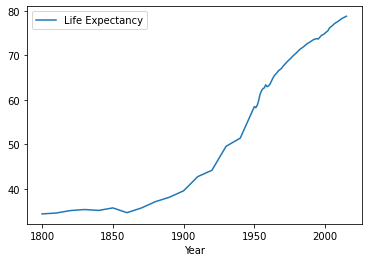

In [ ]:
def visual3():
  df = pd.read_csv("cleanedlifeexpectancy.csv", index_col = 0)
  return df.groupby('Year')['Life Expectancy'].mean().plot(legend = True)






############ Function Call ############
visual3()

### Visualization 3 Explanation

The line graph above links to the first insight, which focuses on the Average Life Expectancies for nations throughout the years. This helps us visualize how life expectancy changed in different periods of time, and how that links with increasing Healthcare Spending. The x axis is Year, and the Y axis is Life Expectancy.

## Summary Files

In [ ]:
import pandas as pd
def summary1():
  writer = pd.ExcelWriter('cssummaryfile.xlsx')
  a = insight1()
  b = insight2()
  c = insight3()
  d = insight4()
  e = insight5()
  a.to_excel(writer, sheet_name = "Average Life Expectancy 1800-2015")
  b.to_excel(writer, sheet_name = 'HSPC Percent change 2002-2018')
  c.to_excel(writer, sheet_name = '2026 Predicted Healthcare Spending Per Capita')
  d.to_excel(writer, sheet_name = 'Volume of Health Expenditure')
  e.to_excel(writer, sheet_name = 'Top Performing Nations')
  writer.save()





############ Function Call ############
summary1()

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance
https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/

https://www.shutterstock.com/search/country-flags

https://plotly.com/



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link https://youtu.be/YOnDdjoy5FA


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
